In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [48]:
# Load the CSV file into a DataFrame
df = pd.read_csv('customer_churn_dataset-training-master.csv')

# Display the first 5 rows of the DataFrame
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
#List of the columns
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [4]:
#Inspect the churn column
df['Churn']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440828    0.0
440829    0.0
440830    0.0
440831    0.0
440832    0.0
Name: Churn, Length: 440833, dtype: float64

In [5]:
#Print the shape to understand the size of the dataset and print the data types of all the features
print(df.shape)
print(df.dtypes)

(440833, 12)
CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object


Gender, Subscription Type, and Contract Length are objects so these will need to be converted to be a numerical value

In [4]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
row_nan_count = np.sum(df.isnull(), axis=1)
row_nan_count

0         0
1         0
2         0
3         0
4         0
         ..
440828    0
440829    0
440830    0
440831    0
440832    0
Length: 440833, dtype: int64

After looking through the dataset, row 199295 has missing values for all the columns. Therefore, we can remove this row.

In [49]:
df.iloc[199295]

CustomerID           NaN
Age                  NaN
Gender               NaN
Tenure               NaN
Usage Frequency      NaN
Support Calls        NaN
Payment Delay        NaN
Subscription Type    NaN
Contract Length      NaN
Total Spend          NaN
Last Interaction     NaN
Churn                NaN
Name: 199295, dtype: object

In [50]:
#Drop row 199295
df.drop(199295, inplace=True)

In [51]:
#Ensure that row 199295 was removed
df.iloc[199295]

CustomerID           204107.0
Age                      36.0
Gender                 Female
Tenure                   46.0
Usage Frequency          24.0
Support Calls             7.0
Payment Delay             1.0
Subscription Type       Basic
Contract Length       Monthly
Total Spend             118.9
Last Interaction         27.0
Churn                     1.0
Name: 199296, dtype: object

In [52]:
#Recheck for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [10]:
#List the different values for the columns with object type
print(df['Gender'].unique())
print(df['Subscription Type'].unique())
print(df['Contract Length'].unique())


['Female' 'Male']
['Standard' 'Basic' 'Premium']
['Annual' 'Monthly' 'Quarterly']


In [53]:
#Perform one-hot encoding
df_gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = df.join(df_gender)
df.drop(columns='Gender', inplace=True)

df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

In [54]:
#Recheck data types
df.dtypes

CustomerID                    float64
Age                           float64
Tenure                        float64
Usage Frequency               float64
Support Calls                 float64
Payment Delay                 float64
Total Spend                   float64
Last Interaction              float64
Churn                         float64
Gender_Female                    bool
Gender_Male                      bool
Subscription Type_Basic          bool
Subscription Type_Premium        bool
Subscription Type_Standard       bool
Contract Length_Annual           bool
Contract Length_Monthly          bool
Contract Length_Quarterly        bool
dtype: object

In [11]:
df.columns

Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn',
       'Gender_Female', 'Gender_Male', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Usage Frequency'}>,
        <Axes: title={'center': 'Support Calls'}>,
        <Axes: title={'center': 'Payment Delay'}>],
       [<Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Last Interaction'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

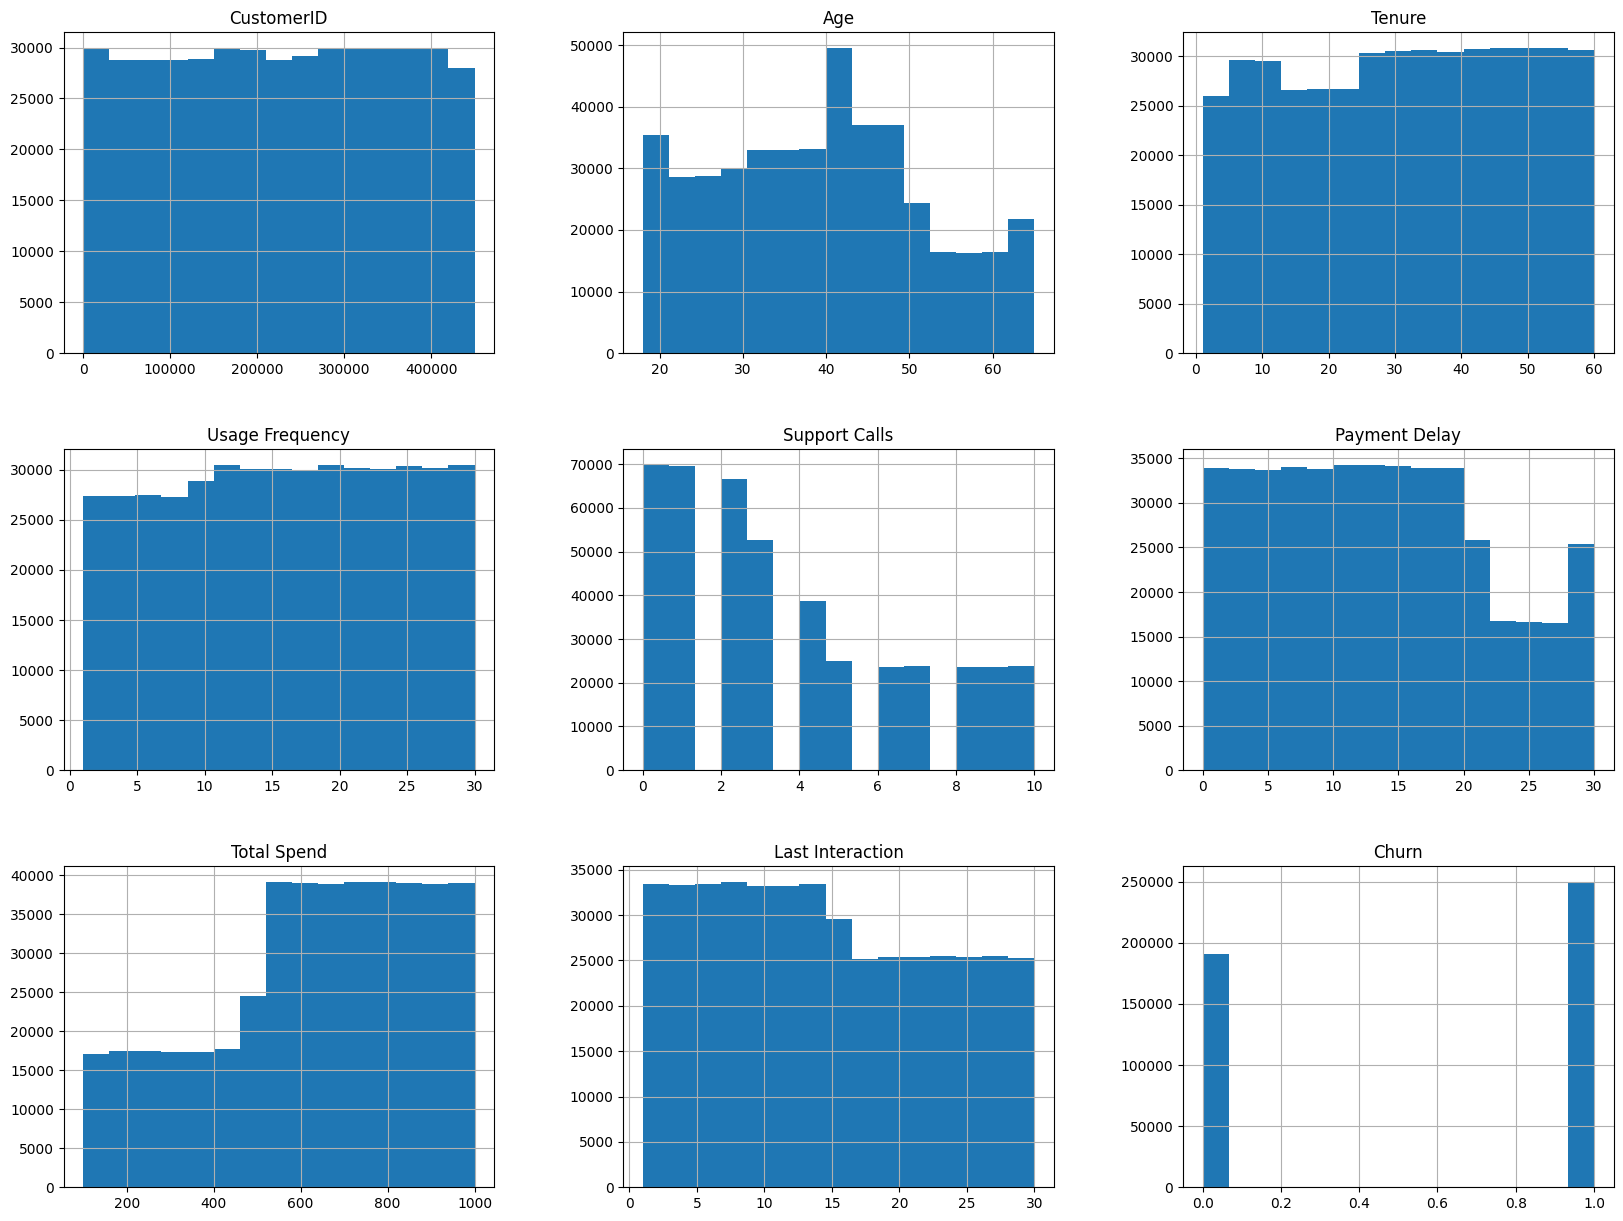

In [12]:

df.hist(bins=15, figsize=(20,15))

<Axes: xlabel='Age', ylabel='Churn'>

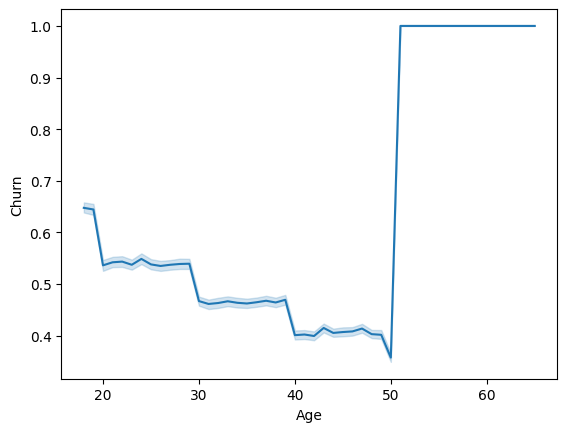

In [15]:
sns.lineplot(x=df['Age'], y=df['Churn'])

In [18]:
#Identifying correlations with the label
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

Churn                         1.00000
Support Calls                 0.57427
Contract Length_Monthly       0.43355
Payment Delay                 0.31213
Age                           0.21839
Gender_Female                 0.17539
Last Interaction              0.14962
Subscription Type_Basic       0.02053
Subscription Type_Standard   -0.00925
Subscription Type_Premium    -0.01107
Usage Frequency              -0.04610
Tenure                       -0.05192
Gender_Male                  -0.17539
Contract Length_Annual       -0.17596
Contract Length_Quarterly    -0.17624
Total Spend                  -0.42935
CustomerID                   -0.83937
Name: Churn, dtype: float64

In [19]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


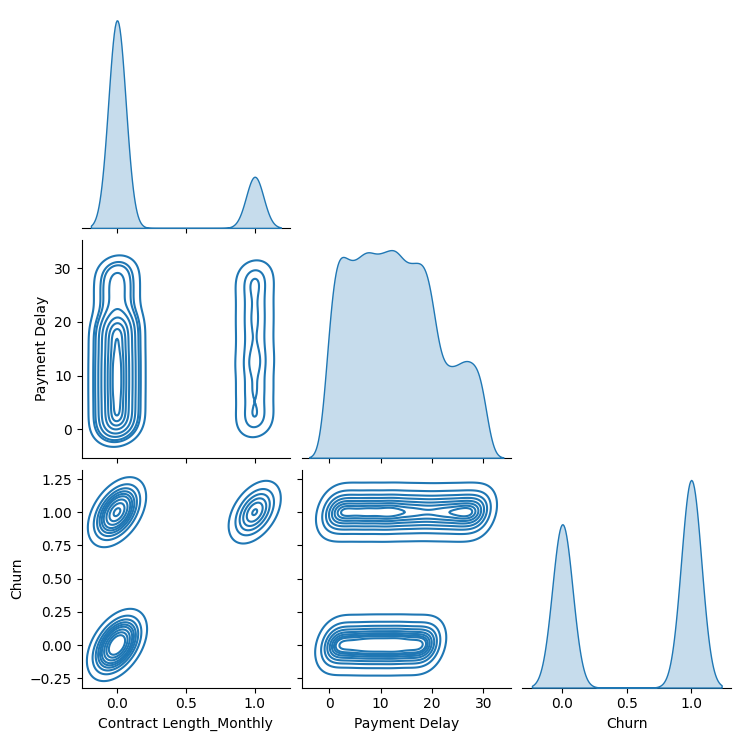

In [20]:
#Visualize the top two correlated features
df_sample = df.sample(n=10000)
top_two_corr = list(corrs_sorted[2:4].index)
df_corrs_sample = df_sample[top_two_corr].copy()
df_corrs_sample['Churn'] = df_sample['Churn']
sns.pairplot(data=df_corrs_sample, kind='kde', corner=True)
#ASK TA about this

^Note: We had to use a sample because using the whole dataset was too large and causing no output

array([[<Axes: title={'center': 'Churn'}>]], dtype=object)

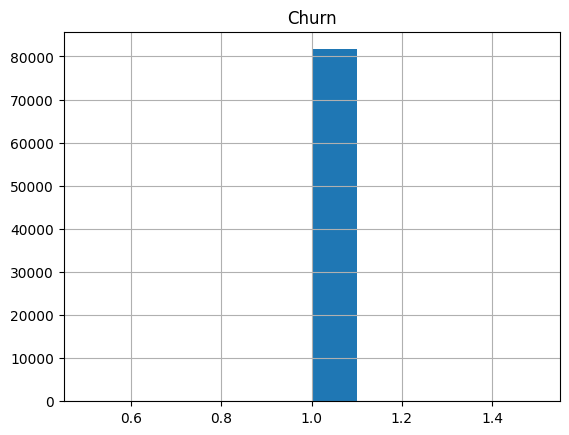

In [44]:
filter_df = df[df['Age']>50]

filter_df
filter_df.hist(column='Churn')

In [45]:
df[df['Age']>50].head(50)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,True,False,True,False,False,False,True,False
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,True,False,True,False,False,False,False,True
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,False,True,False,False,True,False,True,False
5,8.0,51.0,33.0,25.0,9.0,26.0,129.0,8.0,1.0,False,True,False,True,False,True,False,False
6,9.0,58.0,49.0,12.0,3.0,16.0,821.0,24.0,1.0,True,False,False,False,True,False,False,True
7,10.0,55.0,37.0,8.0,4.0,15.0,445.0,30.0,1.0,True,False,False,True,False,True,False,False
9,12.0,64.0,3.0,25.0,2.0,11.0,415.0,29.0,1.0,True,False,False,False,True,False,False,True
11,14.0,52.0,21.0,6.0,3.0,26.0,830.0,19.0,1.0,True,False,False,True,False,False,True,False
20,23.0,57.0,55.0,27.0,3.0,3.0,212.0,10.0,1.0,True,False,True,False,False,True,False,False
24,27.0,59.0,26.0,21.0,0.0,10.0,822.0,17.0,1.0,False,True,False,True,False,False,True,False


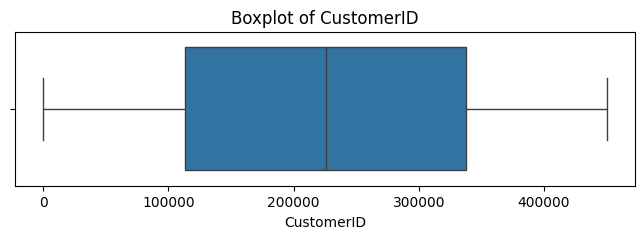

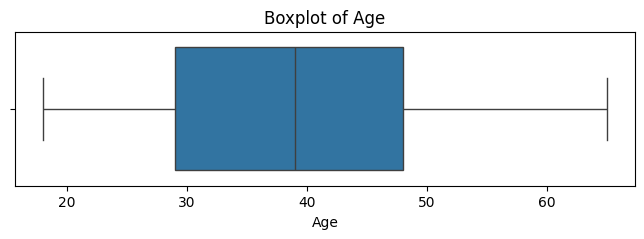

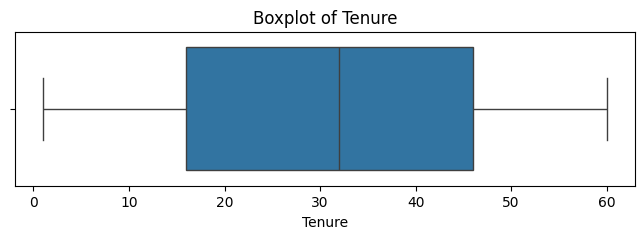

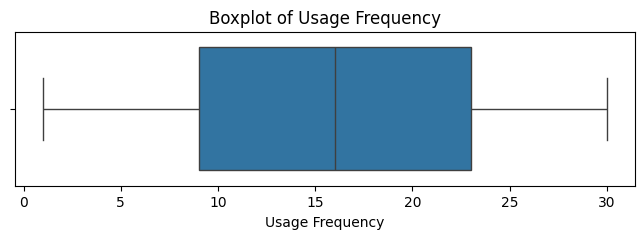

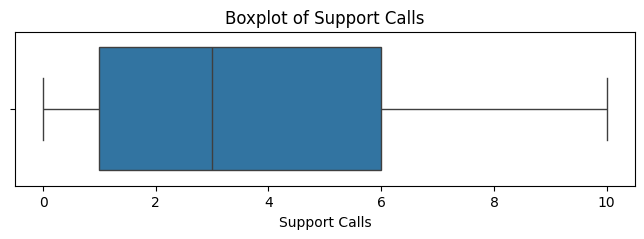

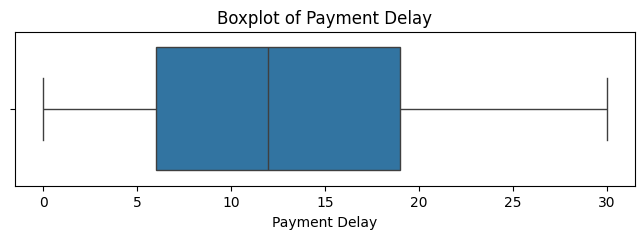

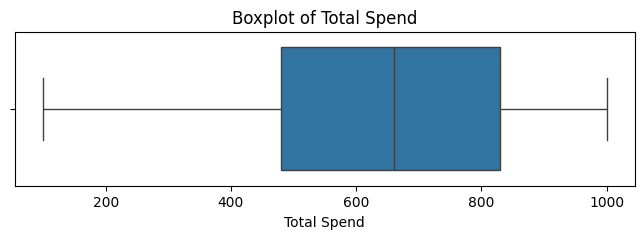

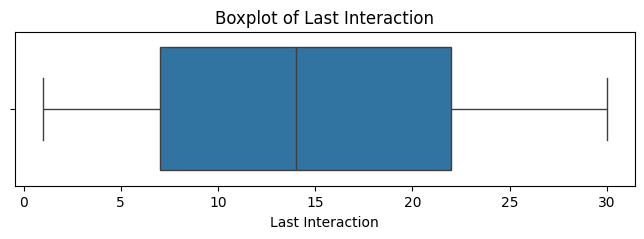

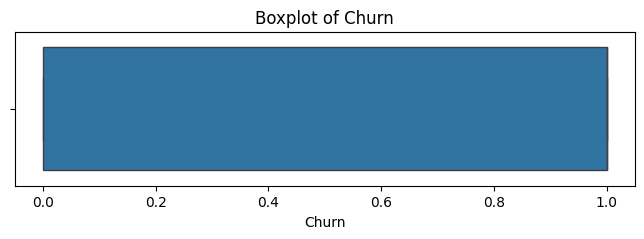

In [22]:
#Create a boxplot for every numerical column to identify outliers
numerical_columns = df.select_dtypes(include='float64').columns

for column in numerical_columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

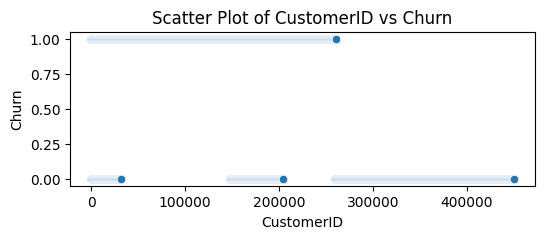

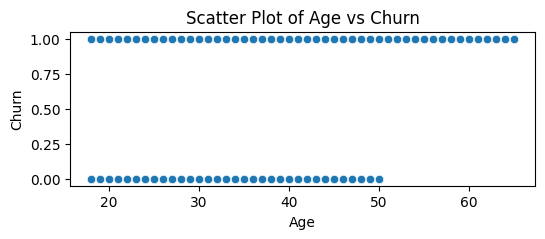

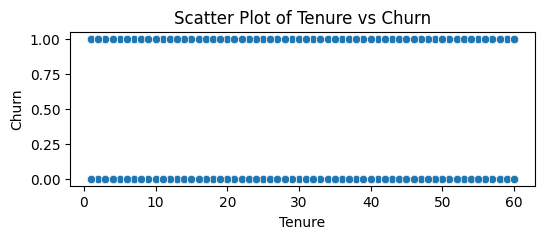

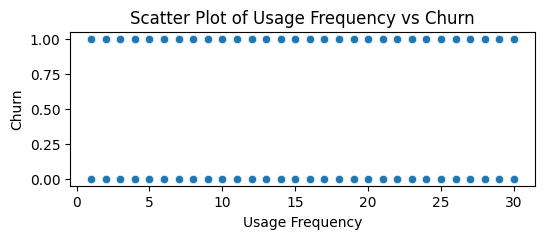

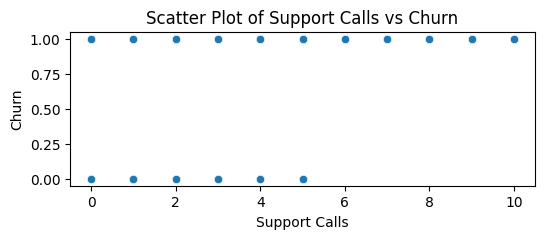

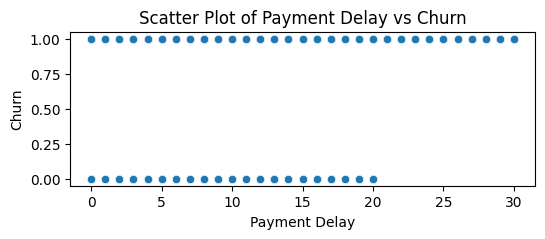

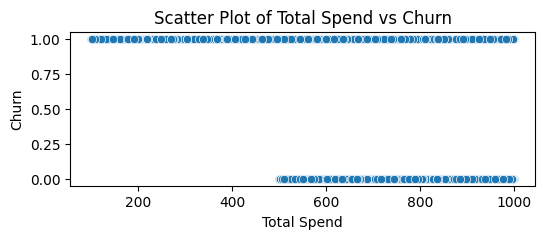

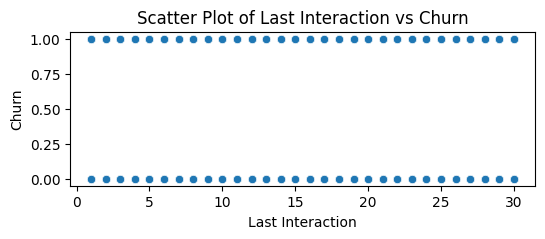

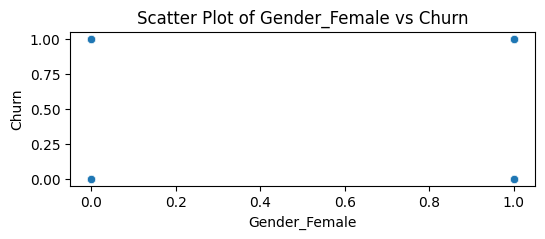

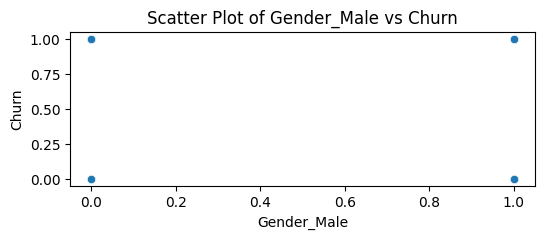

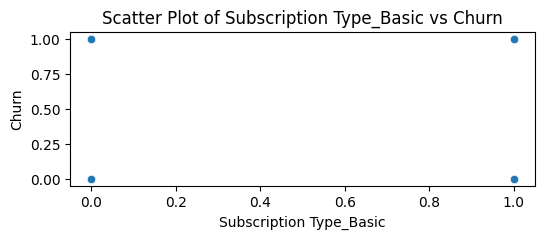

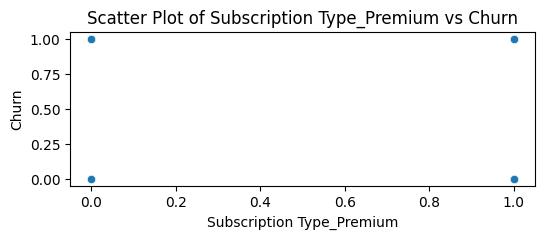

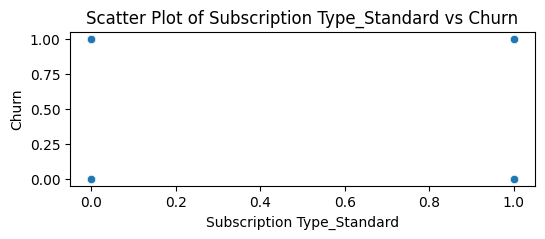

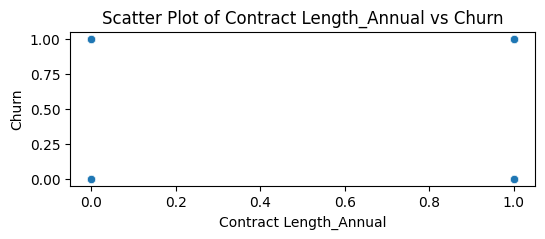

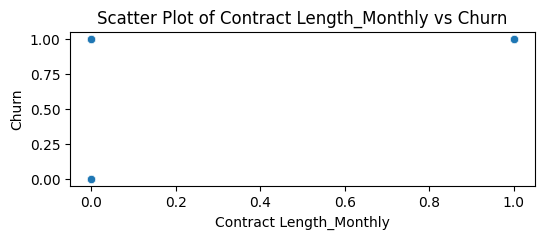

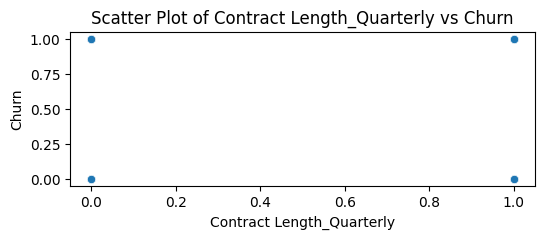

In [23]:
#Create a scatterplot to visualize the relationship between each column and the label
features = df.columns[df.columns != 'Churn']

for feature in features:
    plt.figure(figsize=(6, 2))
    sns.scatterplot(x=df[feature], y=df['Churn'])
    plt.title(f'Scatter Plot of {feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Churn')
    plt.show()


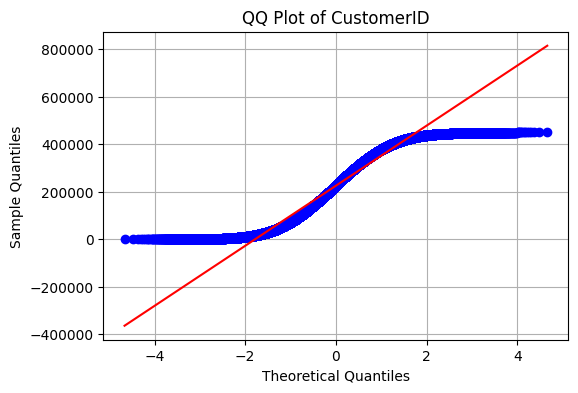

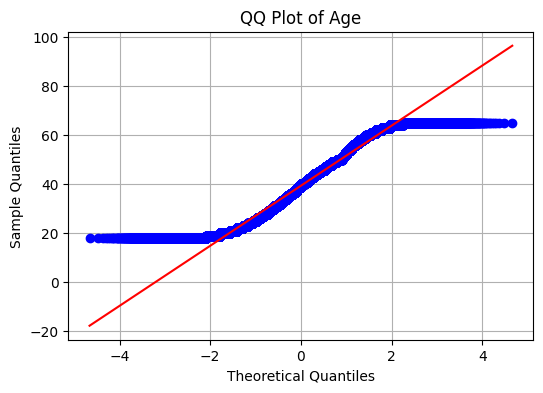

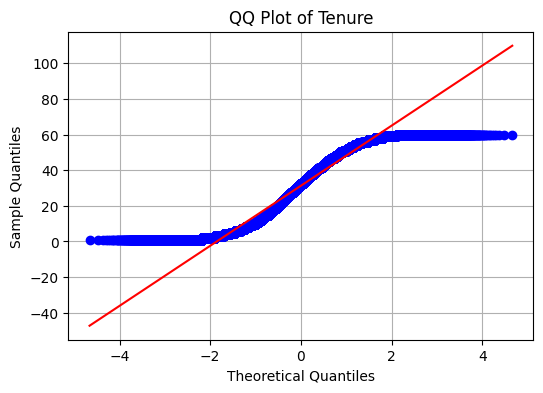

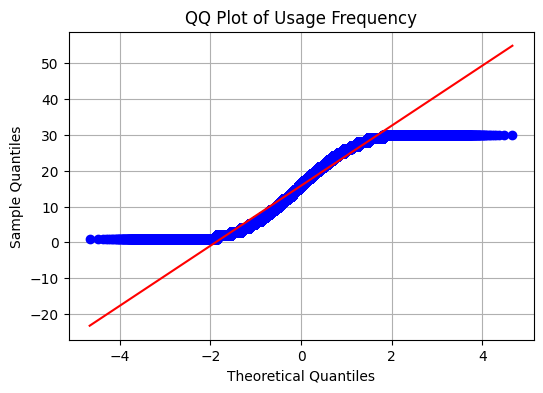

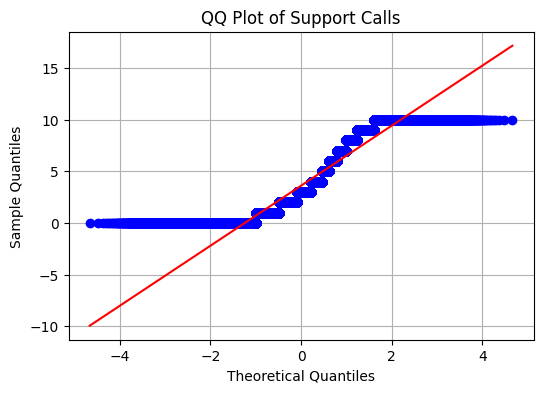

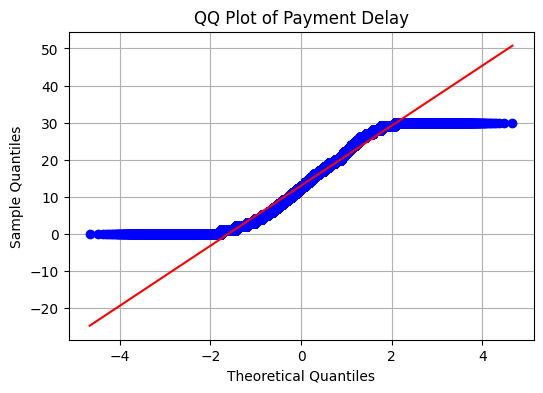

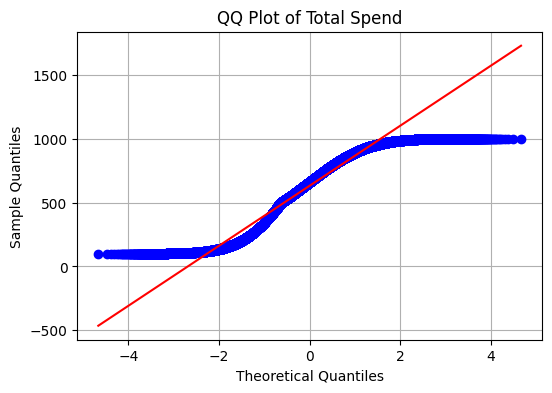

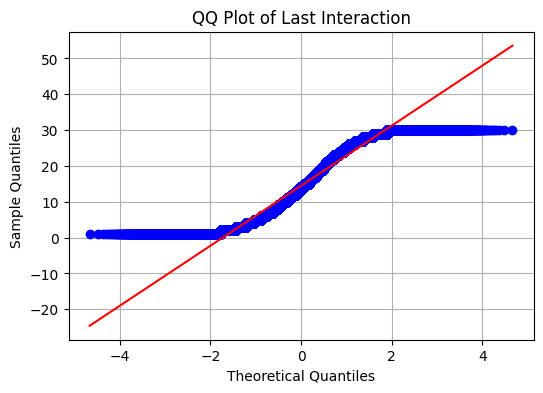

In [24]:
#Create a QQ Plot to determine if each numerical column has a normal distribution
numerical_columns = df.select_dtypes(include='float64').columns
numerical_columns_list = list(numerical_columns)
numerical_columns_list.remove('Churn')
numerical_columns = pd.Index(numerical_columns_list)

for feature in numerical_columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.show()


From the QQ plots, the numerical columns have less of a straight line curve and more of a cube root curve. This indicates that the columns do not have a normal distribution and will need to be transformed ?

*************Experimentation with including and not include Age as a feature 

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#Normalize the numerical features by scaling values between 0 and 1
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns)

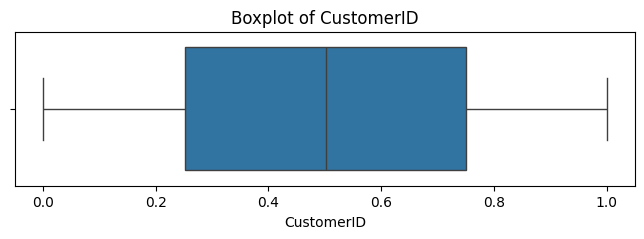

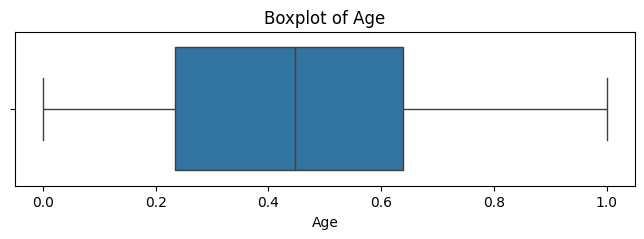

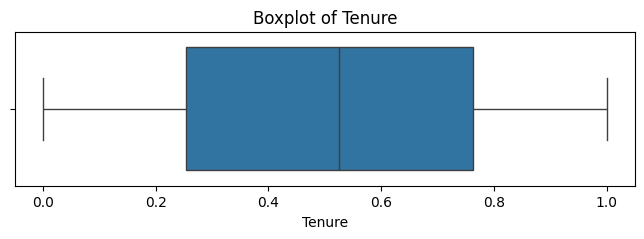

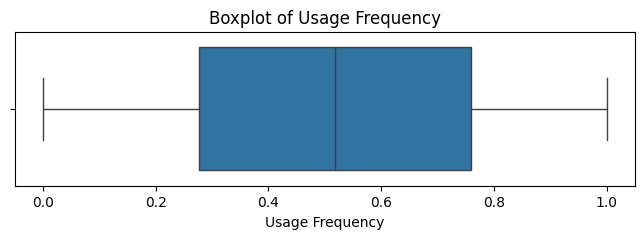

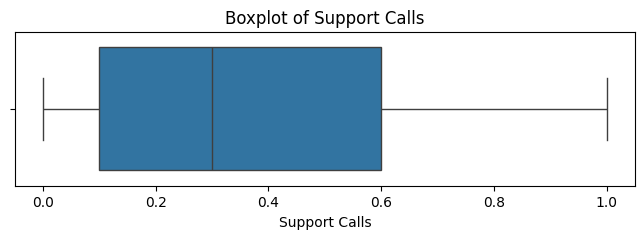

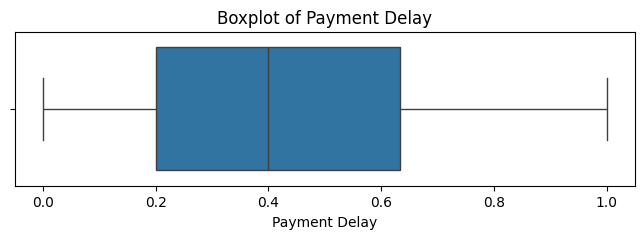

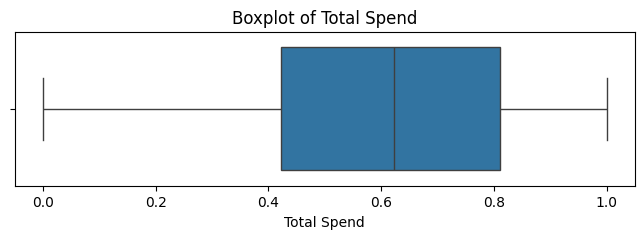

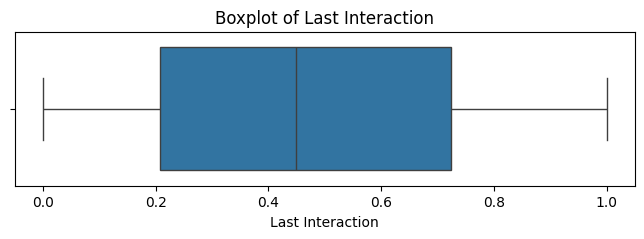

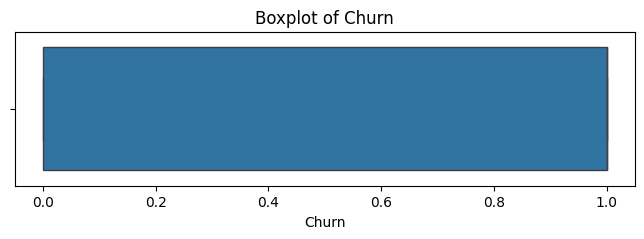

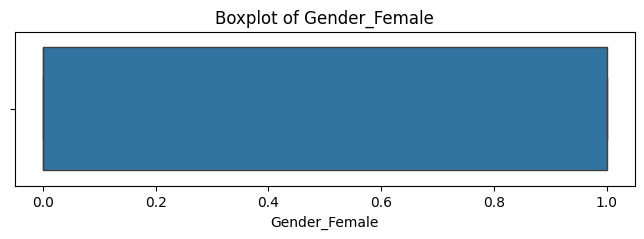

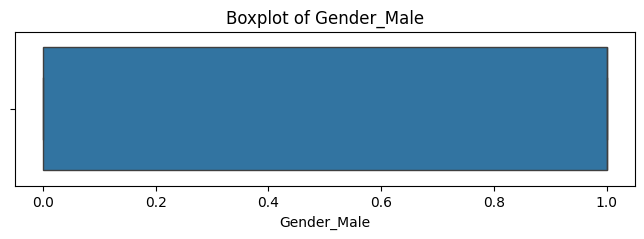

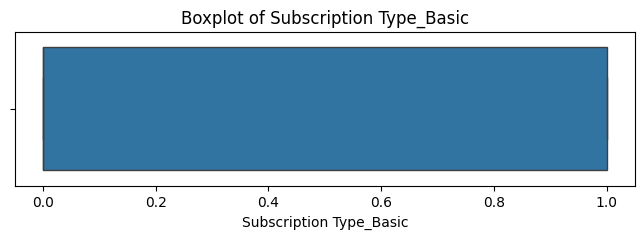

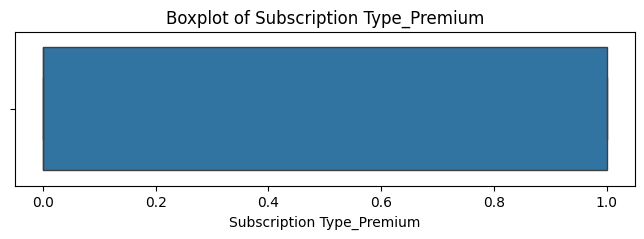

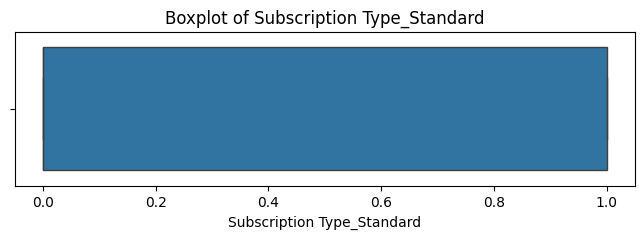

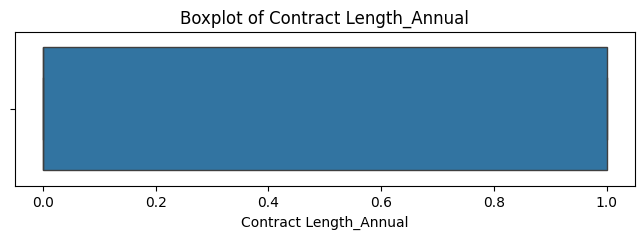

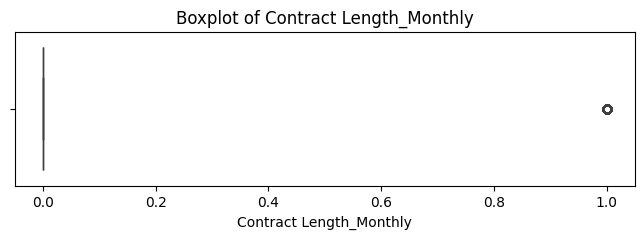

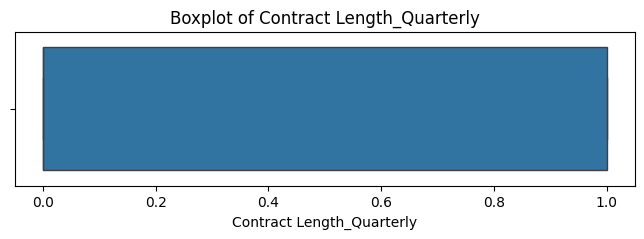

In [15]:
#Create a boxplot for every numerical column to check if all features are scaled
numerical_columns = df_norm.select_dtypes(include='float64').columns

for column in numerical_columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df_norm[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import log_loss

In [57]:
#Read in the testing data and transform it the same way as the training data
df_testing = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [17]:
df_testing.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [58]:
#Check for null values
nan_count = np.sum(df_testing.isnull(), axis=0)
nan_count

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [59]:
#Perform one-hot encoding
df_gender = pd.get_dummies(df_testing['Gender'], prefix='Gender')
df_testing = df_testing.join(df_gender)
df_testing.drop(columns='Gender', inplace=True)

df_subscription_type = pd.get_dummies(df_testing['Subscription Type'], prefix='Subscription Type')
df_testing = df_testing.join(df_subscription_type)
df_testing.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df_testing['Contract Length'], prefix='Contract Length')
df_testing = df_testing.join(df_contract_length)
df_testing.drop(columns='Contract Length', inplace=True)

In [20]:
df_testing.columns

Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn',
       'Gender_Female', 'Gender_Male', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

In [21]:
#Normalize the numerical features by scaling values between 0 and 1
scaler = MinMaxScaler()
df_norm_test = scaler.fit_transform(df_testing)
df_norm_test = pd.DataFrame(df_norm_test, columns=df_testing.columns)

******WITH AGE as a feature

In [23]:
y_train = df_norm['Churn']
X_train = df_norm.drop(columns = 'Churn', axis=1)

In [24]:
y_test = df_norm_test['Churn']
X_test = df_norm_test.drop(columns = 'Churn', axis=1)

In [25]:
model_default = LogisticRegression(max_iter=1000, C=1.0)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# 1. Make predictions on the test data using the predict_proba() method
pp = model_default.predict_proba(X_test)
proba_predictions_default = []
for i in pp:
    proba_predictions_default.append(i[1])
    
# 2. Make predictions on the test data using the predict() method
class_label_predictions_default = model_default.predict(X_test)

In [27]:
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])
pd.DataFrame(
c_m,
columns=['Predicted: Customer will churn', 'Predicted: Cutomer will not churn'],
index=['Actual: Customer will churn', 'Actual: Customer will not churn']
)

,Predicted: Customer will churn,Predicted: Cutomer will not churn
Actual: Customer will churn,23378,7115
Actual: Customer will not churn,30702,3179


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [29]:
print(classification_report(y_test, class_label_predictions_default, target_names=['Churned', 'Not Churned'], digits=4))

              precision    recall  f1-score   support

     Churned     0.3088    0.0938    0.1439     33881
 Not Churned     0.4323    0.7667    0.5528     30493

    accuracy                         0.4125     64374
   macro avg     0.3706    0.4302    0.3484     64374
weighted avg     0.3673    0.4125    0.3376     64374



In [30]:
accuracy_score(y_test, class_label_predictions_default)

0.4125423307546525

In [32]:
# Another way
model = LogisticRegression(C=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
acc_score = accuracy_score(y_test, predictions)
lg_loss = log_loss(y_test, probabilities)

print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score))

Log loss=4.184174352292087, accuracy score: 0.4125423307546525


*******WITHOUT AGE as a feature

In [33]:
df_norm_test.drop(columns = 'Age', inplace=True)

In [34]:
df_without_age = df_norm.drop(columns ='Age')

In [35]:
df_without_age.columns

Index(['CustomerID', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn',
       'Gender_Female', 'Gender_Male', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

In [36]:
df_norm_test.columns

Index(['CustomerID', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn',
       'Gender_Female', 'Gender_Male', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

In [37]:
y_train = df_without_age['Churn']
X_train = df_without_age.drop(columns = 'Churn', axis=1)

In [38]:
model_default = LogisticRegression(max_iter=1000, C=1.0)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_test = df_norm_test['Churn']
X_test = df_norm_test.drop(columns = 'Churn', axis=1)

In [40]:

# 1. Make predictions on the test data using the predict_proba() method
pp = model_default.predict_proba(X_test)
proba_predictions_default = []
for i in pp:
    proba_predictions_default.append(i[1])
    
# 2. Make predictions on the test data using the predict() method
class_label_predictions_default = model_default.predict(X_test)

In [41]:
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])
pd.DataFrame(
c_m,
columns=['Predicted: Customer will churn', 'Predicted: Cutomer will not churn'],
index=['Actual: Customer will churn', 'Actual: Customer will not churn']
)

,Predicted: Customer will churn,Predicted: Cutomer will not churn
Actual: Customer will churn,23051,7442
Actual: Customer will not churn,30675,3206


In [42]:
print(classification_report(y_test, class_label_predictions_default, target_names=['Churned', 'Not Churned'], digits=4))

              precision    recall  f1-score   support

     Churned     0.3011    0.0946    0.1440     33881
 Not Churned     0.4290    0.7559    0.5474     30493

    accuracy                         0.4079     64374
   macro avg     0.3651    0.4253    0.3457     64374
weighted avg     0.3617    0.4079    0.3351     64374



In [43]:
accuracy_score(y_test, class_label_predictions_default)

0.40788206418740486

In [44]:
# Another way
model = LogisticRegression(C=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
acc_score = accuracy_score(y_test, predictions)
lg_loss = log_loss(y_test, probabilities)

print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score))

Log loss=4.261588299019716, accuracy score: 0.40788206418740486


Results:

With age as a feature: 
Log loss=4.184174352292087, accuracy score: 0.4125423307546525

              precision    recall  f1-score   support

     Churned     0.3088    0.0938    0.1439     33881
     Not Churned     0.4323    0.7667    0.5528     30493

Without age as a feature:
Log loss=4.261588299019716, accuracy score: 0.40788206418740486

              precision    recall  f1-score   support

     Churned     0.3011    0.0946    0.1440     33881
     Not Churned     0.4290    0.7559    0.5474     30493

Therefore, with age as a feature is slightly better but nothing very significant. It has a lower log loss, higher accuracy, and relatively similar values for precision, recall, and f1-score. This may indicate that having age as a feature does not have a major influence on accurate churn predictions but is beneifical to include as a feature.

Overall, age has a correlation of 0.21839 with churn indicating low correlation

****Dropping columns

In [22]:
df_norm.columns

Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn',
       'Gender_Female', 'Gender_Male', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

In [23]:
y_train = df_norm['Churn']
X_train = df_norm.drop(columns = ['Churn', 'CustomerID', 'Gender_Male', 'Gender_Female'], axis=1)

In [36]:
X_train.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

In [37]:
y_test = df_norm_test['Churn']
X_test = df_norm_test.drop(columns = ['Churn', 'CustomerID', 'Gender_Male', 'Gender_Female'], axis=1)

In [46]:
X_test.head(10)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,0.085106,0.406780,0.448276,0.4,0.900000,0.553333,0.275862,1.0,0.0,0.0,0.0,1.0,0.0
1,0.489362,0.457627,0.931034,0.7,0.433333,0.537778,0.655172,0.0,0.0,1.0,0.0,1.0,0.0
2,0.617021,0.440678,0.310345,0.2,0.966667,0.730000,0.689655,0.0,1.0,0.0,1.0,0.0,0.0
3,0.361702,0.135593,0.379310,0.5,0.566667,0.146667,0.586207,0.0,1.0,0.0,0.0,0.0,1.0
4,0.744681,0.966102,0.793103,0.9,0.066667,0.481111,0.586207,0.0,0.0,1.0,1.0,0.0,0.0
5,0.255319,0.677966,0.448276,1.0,0.333333,0.444444,0.965517,0.0,1.0,0.0,0.0,1.0,0.0
6,0.617021,0.610169,0.482759,0.9,0.933333,0.526667,0.448276,1.0,0.0,0.0,0.0,0.0,1.0
7,0.765957,0.593220,0.344828,0.0,0.600000,0.247778,0.517241,0.0,0.0,1.0,0.0,1.0,0.0
8,0.382979,0.322034,0.137931,1.0,0.266667,0.652222,0.241379,1.0,0.0,0.0,0.0,1.0,0.0
9,1.000000,0.118644,0.103448,0.2,0.766667,0.994444,0.310345,1.0,0.0,0.0,1.0,0.0,0.0


In [39]:
X_test.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

In [40]:
model_default = LogisticRegression(max_iter=1000, C=1.0)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# 1. Make predictions on the test data using the predict_proba() method
pp = model_default.predict_proba(X_test)
proba_predictions_default = []
for i in pp:
    proba_predictions_default.append(i[1])
    
# 2. Make predictions on the test data using the predict() method
class_label_predictions_default = model_default.predict(X_test)

In [42]:
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])
pd.DataFrame(
c_m,
columns=['Predicted: Customer will churn', 'Predicted: Cutomer will not churn'],
index=['Actual: Customer will churn', 'Actual: Customer will not churn']
)

,Predicted: Customer will churn,Predicted: Cutomer will not churn
Actual: Customer will churn,30199,294
Actual: Customer will not churn,27103,6778


In [43]:
print(classification_report(y_test, class_label_predictions_default, target_names=['Churned', 'Not Churned'], digits=4))

              precision    recall  f1-score   support

     Churned     0.9584    0.2001    0.3310     33881
 Not Churned     0.5270    0.9904    0.6879     30493

    accuracy                         0.5744     64374
   macro avg     0.7427    0.5952    0.5095     64374
weighted avg     0.7541    0.5744    0.5001     64374



In [44]:
accuracy_score(y_test, class_label_predictions_default)

0.5744089228570541

In [45]:
# Another way
model = LogisticRegression(C=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
acc_score = accuracy_score(y_test, predictions)
lg_loss = log_loss(y_test, probabilities)

print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score))

Log loss=2.8966020752081385, accuracy score: 0.5744089228570541


***Age < 51

In [55]:
df = df[df['Age'] < 51]

In [56]:
#Normalize the numerical features by scaling values between 0 and 1
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns)

In [60]:
df_testing = df_testing[df_testing['Age'] < 51]

In [61]:
#Normalize the numerical features by scaling values between 0 and 1
scaler = MinMaxScaler()
df_norm_test = scaler.fit_transform(df_testing)
df_norm_test = pd.DataFrame(df_norm_test, columns=df_testing.columns)

In [62]:
y_train = df_norm['Churn']
X_train = df_norm.drop(columns = ['Churn', 'CustomerID', 'Gender_Male', 'Gender_Female'], axis=1)

In [63]:
y_test = df_norm_test['Churn']
X_test = df_norm_test.drop(columns = ['Churn', 'CustomerID', 'Gender_Male', 'Gender_Female'], axis=1)

In [64]:
model_default = LogisticRegression(max_iter=1000, C=1.0)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [65]:
# 1. Make predictions on the test data using the predict_proba() method
pp = model_default.predict_proba(X_test)
proba_predictions_default = []
for i in pp:
    proba_predictions_default.append(i[1])
    
# 2. Make predictions on the test data using the predict() method
class_label_predictions_default = model_default.predict(X_test)

In [66]:
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])
pd.DataFrame(
c_m,
columns=['Predicted: Customer will churn', 'Predicted: Cutomer will not churn'],
index=['Actual: Customer will churn', 'Actual: Customer will not churn']
)

,Predicted: Customer will churn,Predicted: Cutomer will not churn
Actual: Customer will churn,18929,260
Actual: Customer will not churn,18551,5276


In [67]:
print(classification_report(y_test, class_label_predictions_default, target_names=['Churned', 'Not Churned'], digits=4))

              precision    recall  f1-score   support

     Churned     0.9530    0.2214    0.3594     23827
 Not Churned     0.5050    0.9865    0.6681     19189

    accuracy                         0.5627     43016
   macro avg     0.7290    0.6039    0.5137     43016
weighted avg     0.7532    0.5627    0.4971     43016



In [68]:
accuracy_score(y_test, class_label_predictions_default)

0.562697600892691

In [69]:
# Another way
model = LogisticRegression(C=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
acc_score = accuracy_score(y_test, predictions)
lg_loss = log_loss(y_test, probabilities)

print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score))

Log loss=3.291478803664528, accuracy score: 0.562697600892691
